# Sampling pi

Notebook written by [Manon Michel](manon.michel@uca.fr)

The beginning of stochastic computation takes place in the XVIIIth century with Buffon’s needle problem, the earliest problem of geometric probability. In 1733, the French naturalist asked the question of determining the probability that a needle of a certain length will lend on a line of the parquet flooring, made of equally spaced and parallel planks (1, p. 43- 45) and solved it in 1777 (2, p. 100 - 104). Even if it was not Buffon’s prime interest, the needle problem can be considered as the first Monte Carlo computation of the number $\pi$, by dropping needles on the parquet flooring and counting how many intersect a line of the floor.

![](buffon_start.png)

The goal here is to recreate the Buffon needle's game and to come up with a better sampling of $\pi$.

Refs:

(1) Buffon. [Histoire de l’Académie Royale des Sciences](http://gallica.bnf.fr/ark:/12148/bpt6k3530m/f51.image.r=). Imprimerie royale (Paris), 1733.

(2) G.-L. Leclerc comte de Buffon. [Histoire Naturelle, Générale et Particulière : supplément](http://www.buffon.cnrs.fr/ice/ice_page_detail.php?lang=fr&type=text&bdd=buffon&table=buffon_hn&bookId=33&typeofbookDes=hns&pageChapter=&pageOrder=104&facsimile=off&search=no). Tome Quatrième. Imprimerie royale (Paris), 1777.


Find below the animation of the simulation to recreate.

<video width="980 " height=" " 
       src="Buffon.mp4"  
       controls>
</video>

Library importation

In [1]:
import numpy as np
import random, math
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.lines as mlines
from matplotlib.ticker import FixedLocator

plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 8

Below, please:
1. Write the routine `add_needle` for the random needle throw.
2. What is the impact of the value of the r parameter?
3. Analytically derive the probability of a needle throw hitting two planks (r < 1 case)
4. What is the average value of the observable $\theta$ which is equal to $1$ when a needle hits two planks and $0$ otherwise?
5. Write the routine `get_running_pi` to estimate $\pi$ from the first `n_throws` samples (`n_throws` being a number)
6. Write the routine `generate_throws` to generate $N$ samples and print the estimated value of $\pi$


# Needle Simulation

## Adding a Needle

To insert a needle:

- Begin by choosing its center position uniformly within the $10 \times 10$ square.
- Next, determine the needle's angle, which we'll denote as $ \phi $.
- Finally, utilize the auxiliary function `check_intersect` to append a boolean value to the `self.data` array. This indicates whether the needle crosses a line.

## Intuition behind 'r'

Qualitatively, a significant value of $ r $ suggests that the needles have a length substantially greater than the width of the planks. Consequently, as $ r $ increases, there's a higher likelihood that a needle will intersect a line.

By studying the situation r<1, we ensure that each needle can intersect at most one line 

## Mathematical Analysis

### When $ r < 1 $:

Assume a needle whose center is positioned randomly within the initial plank of the simulation ($ 0 < x < d $) with an angle $ \phi $.

The needle will intersect either the line at $ x = 0 $ or $ x = d $ unless:

$$ \frac{l}{2} |\cos(\phi)| < x < d - \frac{l}{2} |\cos(\phi)| $$

Therefore, given its angle $ \phi $, the probability of a needle intersecting a line is:

$$ \frac{2 \times \frac{l}{2} |\cos(\phi)|}{d} $$

To determine the overall probability, we integrate this across all possible values of $ \phi $ from 0 to $ \pi $:

$$ P(\text{Intersect}) = \int_{0}^{\pi} \frac{l|\cos(\phi)|}{d \times \pi} d\phi = \frac{2r}{\pi} $$

Thus, $ P(\text{Intersect}) = \frac{2r}{\pi} $.


4. The law of large numbers indicates that the average of $ \phi $ over numerous throws tends towards:

$$ E(\phi) = \frac{2r}{\pi} $$

### Estimating $ \pi $

5. Building upon the observation in point 4, the `get_running_pi` function estimates $ \pi $. It achieves this by computing the average value $ m $ of $ \phi $ over `n_throws` and subsequently returning:

$$ \frac{2r}{m} $$

In [9]:
class buffon_exp:
    def __init__(self):
        # Parameter initialization
        self.l = 0.33 # needle length
        self.d = 1.0 # plank width
        self.r = self.l / self.d 
        self.N = 1000 # Number of needle throws
        self.start = self.N - 1 # number of first plank-hitting needle (
                                #(initialized to a value bigger than self.N)
        self.nx = 10 # Number of planks
        self.ny = 5 # self.d * self.ny = height of a plank
        self.Lx = [i * self.d for i in range(self.nx)]
        self.data = [] # Store whether a throw is hitting two planks or not
        self.C = [] # Store thrown needle positions. A needle configuration
                    # is completely determined by thre triplet (x, y, phi)
                    # x, y = needle center position and phi = needle angle


    def check_intersect(self, needle):
        x,y,phi = needle

        for line in self.Lx:
            if ( x-(self.l/2.0)*np.abs(np.cos(phi))<line and x>line ) or (x<line and x + (self.l/2.0)*np.abs(np.cos(phi)) > line):
                return True
        return False

    def add_needle(self):
        # Write a routine randomly throwing a needle and 
        # checking whether the throw hit two planks 
        x = np.random.rand()*self.nx*self.d
        y= np.random.rand()*self.ny*self.d
        phi = np.random.rand()*2*np.pi

        needle = (x, y, phi)
        self.C.append(needle)

        self.data.append(self.check_intersect(needle))
        
        
    def estimate_pi(self, n_throws):
        # Write a routine to estimate pi from the first `n_throws` samples
        total_intersect = 0
        for i in range(n_throws):
            if self.data[i]:
                total_intersect+=1
        
        if total_intersect ==0:
            return 0
        else:
            return n_throws*2*self.r/total_intersect

    def generate_throws(self):
        # Write a routine to generate self.N needle throw and compute the estimated pi
        for i in range(self.N):
            self.add_needle()
        pi_approx = self.estimate_pi(self.N)
        print(pi_approx)
        return pi_approx
    def plot_error(self, **kwargs):
        # Complete the routine to plot the error between the estimated pi and its true value.
        if 'fig' in kwargs:
            fig_err = kwargs['fig']
        else:
            fig_err = plt.fig(figsize=(9,5))
        if 'color' in kwargs:
            color =  kwargs['color']
        else:
            color = random.choice(['k','b','y','r','chartreuse','magenta'])
        if 'alpha' in kwargs:
            alpha = kwargs['alpha']
        else:
            alpha = 1.0
        ax = fig_err.gca()
        ax.plot(np.array(range(self.N)), 
                np.array([self.estimate_pi(i)-np.pi for i in range(self.N)]),
                 lw=1.5, c = color, alpha = alpha)
            
    def set_fig(self):
        self.fig, self.axes=plt.subplots(1, 2, figsize = (9, 5))
        for i in range(self.nx+1):
            self.axes[0].axvline(x = i * self.d, c = 'k')
        self.axes[0].set_xticks([]);self.axes[0].xaxis.set_ticklabels([])
        self.axes[0].set_yticks([]);self.axes[0].yaxis.set_ticklabels([])
        self.axes[0].set_xlim(-self.d/2.0,self.nx * self.d + self.d/2.0)
        self.axes[0].set_ylim(-self.d/2.0, self.ny * self.d + self.d/2.0)
        self.axes[1].axhline(y=math.pi)
        self.axes[1].set_ylabel(r'$\hat{\pi}$', fontsize=10)
        self.axes[1].set_xlabel(r'$N$', fontsize=10)
        self.axes[1].set_xlim(0,self.N)
        self.axes[1].set_ylim(2.5,4)
    
    def plot_total(self):
        self.set_fig()
        for throw in range(self.N):                
            x, y, phi = self.C[throw]
            if self.data[throw] == 1:
                line = mlines.Line2D([x + self.l / 2.0 * math.cos(phi), x - self.l / 2.0 *math.cos(phi)], 
                                     [y + self.l / 2.0 * math.sin(phi), y - self.l / 2.0 *math.sin(phi)], 
                                     axes = self.axes[0], lw=2., c = 'r')
            else:
                line = mlines.Line2D([x + self.l / 2.0 * math.cos(phi), x - self.l / 2.0 *math.cos(phi)], 
                                     [y + self.l / 2.0 * math.sin(phi), y - self.l / 2.0 *math.sin(phi)], 
                                     axes = self.axes[0], lw=2., alpha = 0.1, c = 'k')
            self.axes[0].add_line(line)
        if self.start < self.N:
            self.axes[1].plot(np.array([float(len(self.data[:(i)])) for i in range(self.N)]), 
                              np.array([self.estimate_pi(i) for i in range(self.N)]),
                              lw=1.5, c = 'k')    
        plt.show()


3.3333333333333335


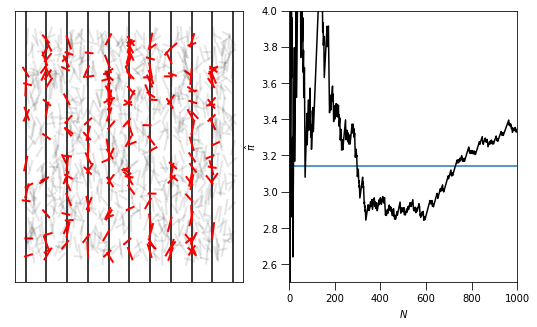

In [10]:
run_buffon = buffon_exp()
run_buffon.generate_throws()
run_buffon.plot_total()

7. How is the error between the estimator $\hat{\pi}$ and $\pi$ behaving with the number of samples $N$? Generate the error plot of 10 experiments. To do so, complete the `plot_error` routine above.



3.0841121495327104
2.9464285714285716
3.3846153846153846
3.1578947368421053
3.4196891191709846
3.173076923076923
3.251231527093596
3.1279620853080567
3.3
3.1132075471698113


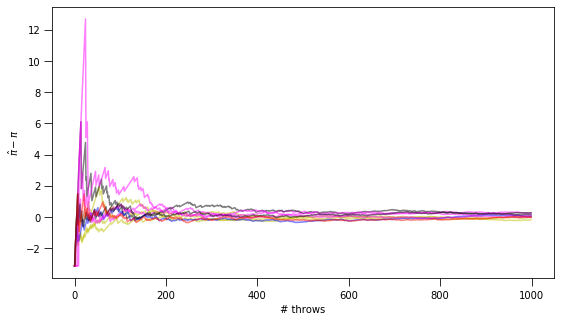

In [11]:
run_buffon = buffon_exp()
fig=plt.figure(figsize=(9,5))
for iter_experiment in range(10):
    run_buffon.generate_throws()
    run_buffon.plot_error(fig=fig, alpha = 0.5)
    run_buffon.C=[]
    run_buffon.data=[]
plt.xlabel('# throws')
plt.ylabel(r'$\hat{\pi}-\pi$')
plt.show()

8. What is the variance of the estimator $\hat{\theta} = \frac{1}{N}\sum_{i=1}^N \theta_i$, $N$ being the number of throws?

9. Derive the variance of the estimator $\hat{\pi}$ you constructed


8. The variance of $ \hat{\theta} $ is given by:
$ \text{Var}(\hat{\theta}) = \frac{1}{N^2} \times \text{Var}\left(\sum_{i} \theta_i\right) $
Due to the independence of the \( \theta_i \) values, this simplifies to:
$ \text{Var}(\hat{\theta}) = \frac{1}{N} \times \text{Var}(\theta_1) $

Additionally, for $ \theta_1 $:
$ \text{Var}(\theta_1) = E(\theta^2) - E(\theta)^2 = \frac{2r}{\pi} \left(1 - \frac{2r}{\pi}\right) $

Consequently, our result is:
$ \text{Var}(\hat{\theta}) = \frac{2r}{N\pi} \left(1 - \frac{2r}{\pi}\right)$

9. Since $\hat{\pi}$ is inversely proportional to $\hat{\theta}$, we use the delta method to find the variance of $\hat{\pi}$:

Define $\hat{Z} = \frac{\hat{\theta}}{2r}$ such that $\hat{\pi} = \frac{1}{\hat{Z}}$

$E(\hat{Z}) = \frac{1}{\pi}$ and $\text{Var}(\hat{Z})= \frac{1}{4r^2} \cdot \frac{2r}{N\pi} \left(1-\frac{2r}{\pi}\right)$

According to the delta method used with the inverse function $f(x) = 1/x$, and using ($f'^2(x) = \frac{1}{x^4}$), we get:
$\text{Var}(\hat{\pi}) \approx \frac{1}{N} \cdot \frac{1}{\pi^4} \left(\frac{1}{2r\pi} - \frac{1}{\pi^2}\right)$




In order to construct an estimator of $\pi$ with a smaller variance, we now consider an experiment which will make the estimator $\hat{\pi}$ proportional to the averaged number of hits. 

We now throw pointwise pebbles in a unit square.
Below, please:

10. Write the routine `add_peeble` for the random peeble throw. What criterion should make a thrown peeble a successful hit?

11. Analytically derive the probability of a peeble throw to be successful

12. What is the average value of the observable $\theta$ which is equal to $1$ when a throw is successful and $0$ otherwise?

13. Write the routine `get_running_pi` to estimate $\pi$ from the first `n_throws` samples (`n_throws` being a number)

14. Write the routine `generate_throws` to generate $N$ samples and print the estimated value of $\pi$

10.A pebble throw is considered a successful hit if it lands inside a disk with a radius of 1. This is because the area of that disk is pivotal for our calculation of $ \pi $.


11. **Probability Derivation**:

Given that the pebble lands inside a unit square, let's consider its coordinates $ X $ and $ Y $. These coordinates are two independent random variables uniformly distributed over the interval $[-1/2, 1/2]$.

To compute the probability of a successful hit, we evaluate:
$ P(\text{successful hit}) = E(1(X^2 + Y^2 \leq 1/4)) $

This can be computed as:
$ P(\text{successful hit}) = \int_{-1/2}^{1/2} \int_{-1/2}^{1/2} 1(x^2 + y^2 \leq 1/4) \, dx \, dy $

Converting to polar coordinates for easier computation, and denoting \( r \) as the radius and $ \theta $ as the angle, we get:
$ P(\text{successful hit}) = \int_{0}^{\pi} \int_{0}^{inf} 1(r^2 < 1/4) \, r \, dr \, d\theta $

Evaluating this, the probability simplifies to:
$ P(\text{successful hit}) = \pi \int_{0}^{1/2} r \, dr = \frac{\pi}{4} $

12. The average value of theta_hat is pi/4 acording to the law of large numbers

In [20]:
class peeble_exp:
    def __init__(self):
        self.data = [] # Store whether a hit is successful or not
        self.C = [] # Store throw positions
        self.N = 1000 # Number of throws
        
    def add_peeble(self):
        # Write a routine randomly throwing a peeble in a unit square and 
        # define a criterion for a successful hit  
        x = np.random.random() - 1/2
        y = np.random.random() - 1/2
        self.C.append((x,y))
        self.data.append(x**2 + y**2 <= 1/4)

    def estimate_pi(self, n_throws):
        # Write a routine to estimate pi from the first `n_throws` samples
        hit_count = 0
        if n_throws==0:
            return 0
        else:
            for i in range(n_throws):
                if self.data[i]:
                    hit_count+=1
            return 4*hit_count/n_throws
        
    def generate_throws(self):
        # Write a routine to generate self.N peeble throw and compute the estimated pi
        for i in range(self.N):
            self.add_peeble()
        pi_approx = self.estimate_pi(self.N)
        print(pi_approx)
        return pi_approx
    
    def plot_error(self, **kwargs):
        # Complete the routine to plot the error between the estimated pi and its true value.
        if 'fig' in kwargs:
            fig_err = kwargs['fig']
        else:
            fig_err = plt.fig(figsize=(9,5))
        if 'color' in kwargs:
            color =  kwargs['color']
        else:
            color = random.choice(['k','b','y','r','chartreuse','magenta'])
        if 'alpha' in kwargs:
            alpha = kwargs['alpha']
        else:
            alpha = 1.0
        ax = fig_err.gca()
        start = self.data.index(1)
        ax.plot(np.array([i for i in range(self.N)]), 
                np.array([self.estimate_pi(i)-np.pi for i in range(self.N)]),
                lw=1.5, c = color, alpha = alpha)

    def set_fig(self):
        self.fig, self.axes=plt.subplots(1, 2, figsize = (9, 5))
        self.axes[0].set_xticks([]);self.axes[0].xaxis.set_ticklabels([])
        self.axes[0].set_yticks([]);self.axes[0].yaxis.set_ticklabels([])
        self.axes[0].set_xlim(-0.7,0.7)
        self.axes[0].set_ylim(-0.7, 0.7)
        self.axes[1].axhline(y=math.pi)
        self.axes[1].set_ylabel(r'$\hat{\pi}$', fontsize=10)
        self.axes[1].set_xlabel(r'$N$', fontsize=10)
        self.axes[1].set_xlim(0,self.N)
        self.axes[1].set_ylim(2.5,3.5)

    def plot_total(self):
        self.set_fig()
        color_list = []
        for throw in range(self.N):
            if self.data[throw] == 1:
                color_list += ['r']
            else:
                color_list += ['k']
        self.axes[0].scatter(np.array(self.C)[:,0], np.array(self.C)[:,1], marker='o', 
                                 color=color_list , alpha=0.8)
        self.axes[1].plot(np.array([ float(len(self.data[:(i)])) for i in range(self.N)]), 
                          np.array([self.estimate_pi(i) for i in range(self.N)]), lw=1.5, c = 'k') 
        plt.show()

3.144


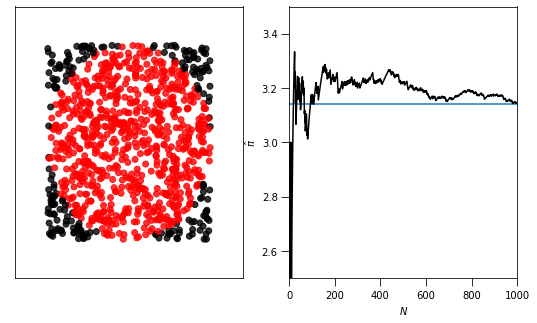

In [21]:
run_peeble = peeble_exp()
run_peeble.generate_throws()
run_peeble.plot_total()

15. How is the error between the estimator $\hat{\pi}$ and $\pi$ behaving with the number of samples $N$? Generate the error plot of 10 experiments and compare with the Buffon experiment. To do so, complete the `plot_error` routine above in `peeble_exp` and run the code below.


3.124
3.216
3.084
3.192
3.22
3.184
3.092
3.124
3.152
3.192


3.5294117647058822
3.473684210526316
3.402061855670103
3.75
3.1279620853080567
2.907488986784141
3.251231527093596
3.0136986301369864
3.142857142857143
3.0275229357798166


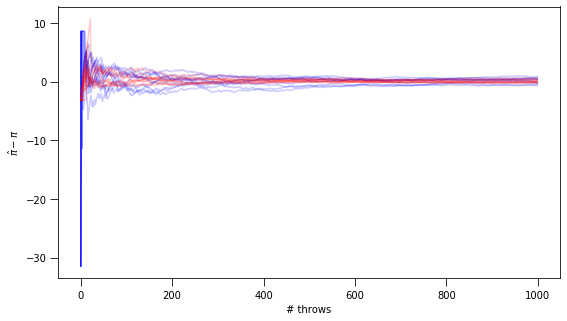

In [22]:
run_peeble = peeble_exp()
run_buffon = buffon_exp()
fig=plt.figure(figsize=(9,5))
for iter_experiment in range(10):
    run_peeble.generate_throws()
    run_peeble.plot_error(fig=fig,color='b',alpha=0.2)
    run_peeble.C=[]
    run_peeble.data=[]
print ('\n')
for iter_experiment in range(10):
    run_buffon.generate_throws()
    run_buffon.plot_error(fig=fig,color='r',alpha=0.2)
    run_buffon.C=[]
    run_buffon.data=[]
plt.xlabel('# throws')
plt.ylabel(r'$\hat{\pi}-\pi$')    
plt.show()

15. Comparing the above graph with the error graph of the needle method, we can see that the convergence towards $\pi$ is much faster with the peeble method (less dispersion in the blue curves).

Using the Central Limit Theorem, we can find the theoretical convergence speed of the estimator $\hat{\pi}$:

Given that
$ \sqrt{n} (\hat{\pi} - \pi) $
converges to
$ \mathcal{N}(0, \pi(4-\pi)) $,
we can conclude that $ \hat{\pi} $ converges to $ \pi $ with a speed proportional to $ \frac{1}{\sqrt{N}} $.

16. Derive the variance of the estimator $\hat{\pi}$ for the peeble experiment. How does it compare to the one of the Buffon experiment? Is it consistent with the numerical experiments?


17. Could you propose a better experiment and estimator to get $\pi$? (Propose it below and compare it with the previous experiments)

16. Using the calculations above, Var(pihat) = pi(4-pi)/N


37,1 for bffon

2,7 for peeble

17. We propose an estimator similar to the peeble estimator, but in 3 dimensions, counting the hits on a sphere